# Signals And Systems Course Applications

##### BASICs

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

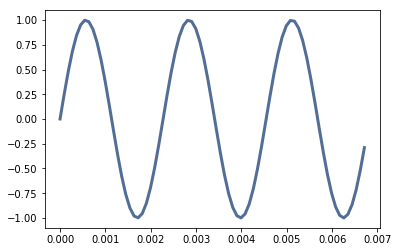

In [89]:
sine = thinkdsp.SinSignal(freq=440, amp=1) 
sine.plot()
sineWave = sine.make_wave(duration=1, start=0, framerate=11025) # famerate is the sampling rate
sineSpectrum = sineWave.make_spectrum()
sineWave.make_audio()

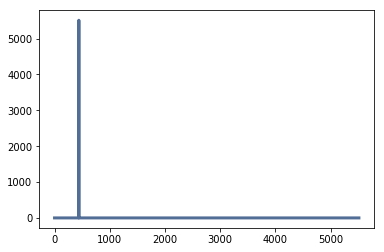

In [142]:
sineSpectrum.plot() # FFT Spectrum

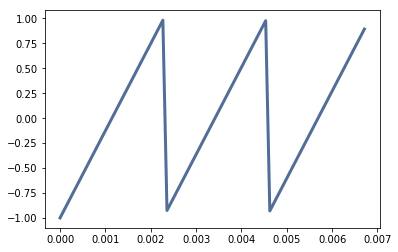

In [88]:
triangle = thinkdsp.SawtoothSignal(freq=440, amp=1)
triangle.plot()
triangleWave = triangle.make_wave(duration=1, start=0, framerate=44100) # famerate is the sampling rate
triangleWave.make_audio()

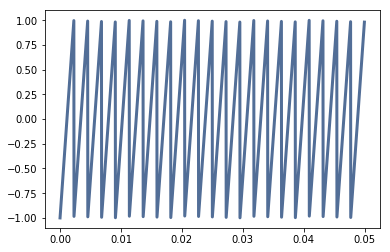

In [106]:
triangleWave.segment(duration=0.05).plot() # at sampling rate 44100

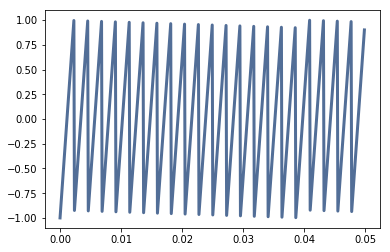

In [105]:
triangleWave2 = triangle.make_wave(duration=1, start=0, framerate=11025) # famerate is the sampling rate
triangleWave2.segment(duration=0.05).plot() # at sampling rate 11025
# **note: the shape is loosly not as the higher sampling rate you can observe it easily

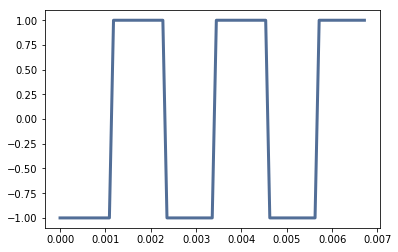

In [137]:
square = thinkdsp.SquareSignal(freq=440) 
square.plot()
Squarewave = square.make_wave(duration=1, start=0, framerate=10000) # famerate is the sampling rate
Squarewave.apodize()
squareWaveSpectrum = Squarewave.make_spectrum()

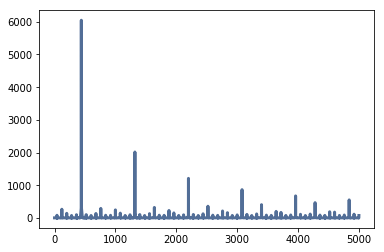

In [150]:
squareWaveSpectrum.plot()
#thinkplot.config(ylim=[0, 1400])

### Chromatic Scale

![frequencies](img/music9.gif)

In [49]:
pianoTileSineSignal = {
     'A'  : thinkdsp.SinSignal(freq=440, amp=1)
    ,'Bb' : thinkdsp.SinSignal(freq=466.16, amp=1)
    ,'B'  : thinkdsp.SinSignal(freq=493.88, amp=1)
    ,'C'  : thinkdsp.SinSignal(freq=523.25, amp=1)
    ,'Db' : thinkdsp.SinSignal(freq=554.37, amp=1)
    ,'D'  : thinkdsp.SinSignal(freq=587.33, amp=1)
    ,'Eb' : thinkdsp.SinSignal(freq=622.25, amp=1)
    ,'E'  : thinkdsp.SinSignal(freq=659.25, amp=1)
    ,'F'  : thinkdsp.SinSignal(freq=698.46, amp=1)
    ,'Gb' : thinkdsp.SinSignal(freq=739.99, amp=1)
    ,'G'  : thinkdsp.SinSignal(freq=783.99, amp=1)
    ,'Ab' : thinkdsp.SinSignal(freq=830.61, amp=1)
    ,'A'  : thinkdsp.SinSignal(freq=880, amp=1)
}

In [43]:
pianoTileTriangleSignal = {
     'A'  : thinkdsp.TriangleSignal(freq=440)
    ,'Bb' : thinkdsp.TriangleSignal(freq=466.16)
    ,'B'  : thinkdsp.TriangleSignal(freq=493.88)
    ,'C'  : thinkdsp.TriangleSignal(freq=523.25)
    ,'Db' : thinkdsp.TriangleSignal(freq=554.37)
    ,'D'  : thinkdsp.TriangleSignal(freq=587.33)
    ,'Eb' : thinkdsp.TriangleSignal(freq=622.25)
    ,'E'  : thinkdsp.TriangleSignal(freq=659.25)
    ,'F'  : thinkdsp.TriangleSignal(freq=698.46)
    ,'Gb' : thinkdsp.TriangleSignal(freq=739.99)
    ,'G'  : thinkdsp.TriangleSignal(freq=783.99)
    ,'Ab' : thinkdsp.TriangleSignal(freq=830.61)
    ,'A'  : thinkdsp.TriangleSignal(freq=880)
}

In [45]:
pianoTileSquareSignal = {
     'A'  : thinkdsp.SquareSignal(freq=440)
    ,'Bb' : thinkdsp.SquareSignal(freq=466.16)
    ,'B'  : thinkdsp.SquareSignal(freq=493.88)
    ,'C'  : thinkdsp.SquareSignal(freq=523.25)
    ,'Db' : thinkdsp.SquareSignal(freq=554.37)
    ,'D'  : thinkdsp.SquareSignal(freq=587.33)
    ,'Eb' : thinkdsp.SquareSignal(freq=622.25)
    ,'E'  : thinkdsp.SquareSignal(freq=659.25)
    ,'F'  : thinkdsp.SquareSignal(freq=698.46)
    ,'Gb' : thinkdsp.SquareSignal(freq=739.99)
    ,'G'  : thinkdsp.SquareSignal(freq=783.99)
    ,'Ab' : thinkdsp.SquareSignal(freq=830.61)
    ,'A'  : thinkdsp.SquareSignal(freq=880)
}

In [54]:
start = 0
scale = pianoTileSineSignal['A'].make_wave(duration=0.5, start=start, framerate=44100)
for i in pianoTileSineSignal.values() :
    scale += i.make_wave(duration=0.5, start=start, framerate=44100)
    start +=0.5
#scale = scale + pianoTile['B'].make_wave(duration=0.5, start=start+0.5, framerate=44100)
scale.make_audio()

In [53]:
start = 0
scale = pianoTileTriangleSignal['A'].make_wave(duration=0.5, start=start, framerate=44100)
for i in pianoTileTriangleSignal.values() :
    scale += i.make_wave(duration=0.5, start=start, framerate=44100)
    start +=0.5
#scale = scale + pianoTile['B'].make_wave(duration=0.5, start=start+0.5, framerate=44100)
scale.make_audio()

In [153]:
start = 0
scale = pianoTileSquareSignal['A'].make_wave(duration=0.5, start=start, framerate=44100)
for i in pianoTileSquareSignal.values() :
    scale += i.make_wave(duration=0.5, start=start, framerate=44100)
    start +=0.5
#scale = scale + pianoTile['B'].make_wave(duration=0.5, start=start+0.5, framerate=44100)
scale.make_audio()

### Play any Single music note

In [161]:
def playLetterNote (noteList) :
    
    pianoTileTriangleSignal = {
     'A'  : thinkdsp.TriangleSignal(freq=440)
    ,'Bb' : thinkdsp.TriangleSignal(freq=466.16)
    ,'B'  : thinkdsp.TriangleSignal(freq=493.88)
    ,'C'  : thinkdsp.TriangleSignal(freq=523.25)
    ,'Db' : thinkdsp.TriangleSignal(freq=554.37)
    ,'D'  : thinkdsp.TriangleSignal(freq=587.33)
    ,'Eb' : thinkdsp.TriangleSignal(freq=622.25)
    ,'E'  : thinkdsp.TriangleSignal(freq=659.25)
    ,'F'  : thinkdsp.TriangleSignal(freq=698.46)
    ,'Gb' : thinkdsp.TriangleSignal(freq=739.99)
    ,'G'  : thinkdsp.TriangleSignal(freq=783.99)
    ,'Ab' : thinkdsp.TriangleSignal(freq=830.61)
    ,'A'  : thinkdsp.TriangleSignal(freq=880)
    }
    
    start=0
    
    sound = pianoTileTriangleSignal['A'].make_wave(duration=0.005, start=start, framerate=44100)
    for i in range( len(noteList[0]) ) :
        sound += pianoTileTriangleSignal[ noteList [0] [i] ].make_wave(
            duration=noteList [1] [i], start=start, framerate=44100)
        start+=noteList [1] [i]
        
    return sound.make_audio()

In [173]:
# 1st dimension is tones, 2nd dimension is duration for relative tone
happyBirthdaynote= [['C','C','D','C','F','E',
                     'C','C','D','C','G','F',
                     'C','C','C','A','F','E','D',
                     'Ab','Ab','A','F','G','F','F'
                    ,'C','C','D','C','F','E',
                     'C','C','D','C','G','F',
                     'C','C','C','A','F','E','D',
                     'Ab','Ab','A','F','G','F','F']
                    ,[0.1, 0.1, 0.3, 0.3, 0.3, 0.7,
                      0.1, 0.1, 0.3, 0.3, 0.3, 0.7,
                      0.1 ,0.1, 0.1, 0.4, 0.4, 0.3, 0.3,
                      0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.6
                     ,0.1, 0.1, 0.3, 0.3, 0.3, 0.7,
                      0.1, 0.1, 0.3, 0.3, 0.3, 0.7,
                      0.1 ,0.1, 0.1, 0.4, 0.4, 0.3, 0.3,
                      0.3, 0.3, 0.4, 0.3, 0.4, 0.3, 0.6]] 
HBaudio=playLetterNote(happyBirthdaynote)
HBaudio

### ECHO 5 times

###### Note: all used sound are downloaded from freesound.org

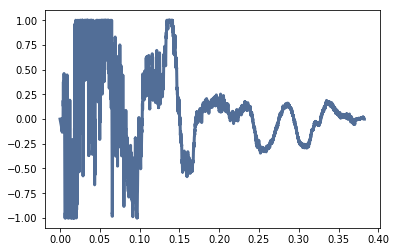

In [175]:
gunSound = thinkdsp.read_wave('sound/275151__bird-man__gun-shot.wav')
gunSound.plot()

In [361]:
gunSound.make_audio()

In [258]:
def shift_scale(wave,shift,scale) :
    res = wave.copy()
    res.scale(scale)
    res.shift(shift)
    return res

In [363]:
def echo(wave) :
    scale = 1.3
    res=wave.copy()
    for i in range(5) :
        shift = res.duration * scale
        res += shift_scale(res, shift, 0.3)
        scale -=0.2
    return res

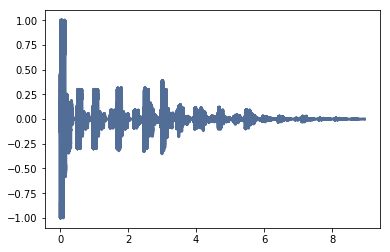

In [364]:
echoedgun = echo(gunSound)
echoedgun.plot()
echoedgun.make_audio()

### Mix and repeate signals

In [316]:
bulletCasting = thinkdsp.read_wave('sound/179005__smartwentcody__bullet-casing-on-concrete-2.wav')
bulletshot = thinkdsp.read_wave('sound/200245__noah-fletcher__homeade-gun-shot1-no-echo.wav')

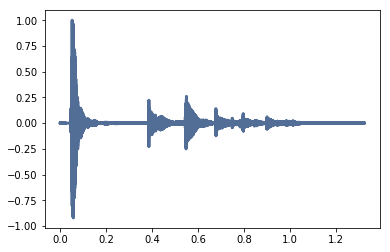

In [365]:
bulletCasting.plot()
bulletCasting.make_audio()

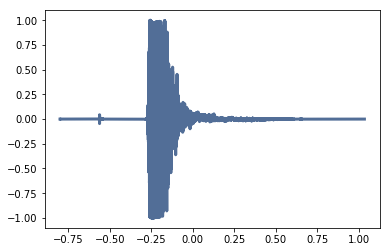

In [366]:
bulletshot.plot()
bulletshot.make_audio()

In [339]:
bulletshot.shift(-1) #shift the bullet shot back by 1 sec so the sound become realstic
bulletshot.framerate=48000 # they didn't have the same sampling rate so i edit one of them by force 😂
mix = bulletshot + bulletCasting

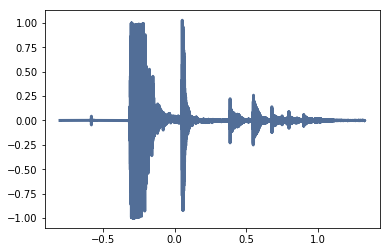

In [340]:
display(mix.make_audio())
mix.plot()

Repeat the signal

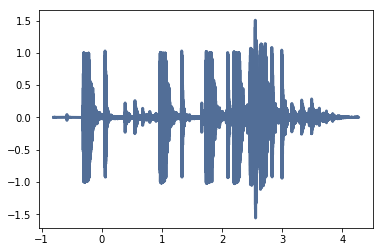

In [360]:
unit = mix.copy()
res = unit
for i in range(5) :
    res += shift_scale(unit, res.duration * 0.6,1)
res.plot()
res.make_audio()

### Convolution (System response)

In [399]:
piano = thinkdsp.read_wave('sound/186942__lemoncreme__piano-melody.wav')
impact = thinkdsp.read_wave('sound/423808__eardeer__orchimpact.wav')

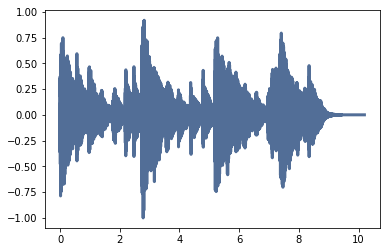

In [400]:
piano.plot()
display(piano.make_audio())
piano = piano.segment(start=0,duration=4)

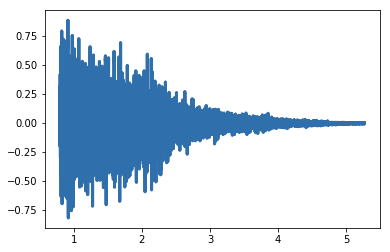

In [403]:
impact.plot()
display(impact.make_audio())
impact = impact.segment(start=0.8)
impact.plot()

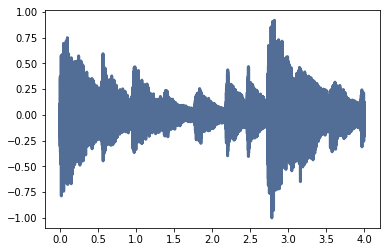

In [406]:
piano.framerate=48000
piano.plot()

In [407]:
convolved = impact.convolve(piano)

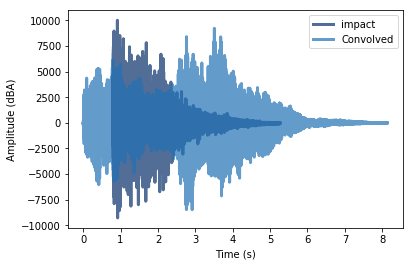

In [412]:
impact.normalize(10000)
impact.plot(label = 'impact')
convolved.plot(label = 'Convolved')
thinkplot.config(xlabel = 'Time (s)',ylabel= ' Amplitude (dBA) ')
display(convolved.make_audio())